In [63]:
import pandas as pd
masses_data = pd.read_csv('mammographic_masses.data.txt',names=["BI-RADS","Age","Shape","Margin","Density","Severity"])
masses_data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [64]:
masses_data.columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
masses_data.replace("?",np.nan, inplace=True)

In [66]:
masses_data.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [67]:
masses_data.isnull().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [68]:
columns = masses_data.columns
for col in columns:
    masses_data[col] = masses_data[col].astype(np.float32)

In [69]:
masses_data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487446,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


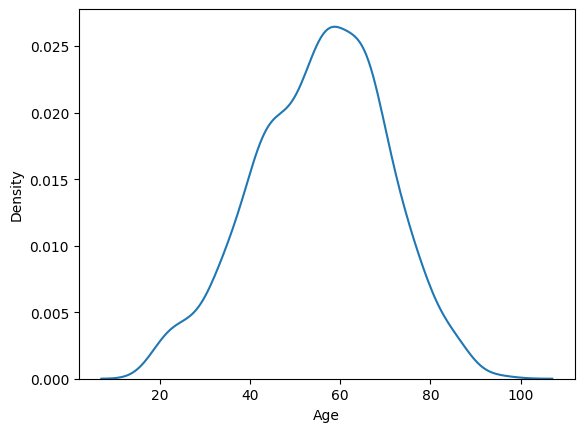

In [70]:
sns.kdeplot(masses_data["Age"])
plt.show()

In [71]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781929,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [72]:
masses_data.isna().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

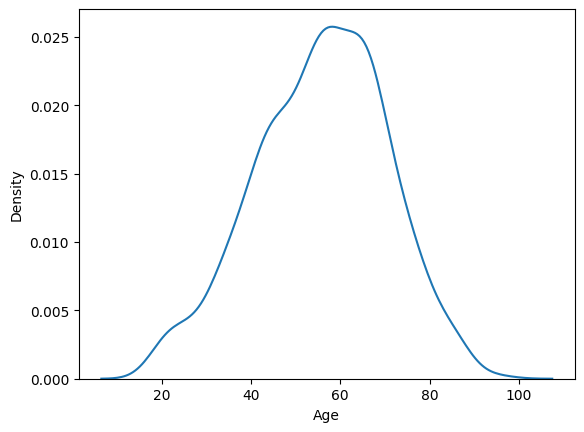

In [73]:
sns.kdeplot(masses_data["Age"])
plt.show()

In [74]:
X = masses_data.drop(columns = ["Severity","BI-RADS"])
y = masses_data["Severity"]

In [75]:
X

,Age,Shape,Margin,Density
0,67.0,3.0,5.0,3.0
2,58.0,4.0,5.0,3.0
3,28.0,1.0,1.0,3.0
8,57.0,1.0,5.0,3.0
10,76.0,1.0,4.0,3.0
...,...,...,...,...
956,47.0,2.0,1.0,3.0
957,56.0,4.0,5.0,3.0
958,64.0,4.0,5.0,3.0
959,66.0,4.0,5.0,3.0


In [76]:
y

0      1.0
2      1.0
3      0.0
8      1.0
10     1.0
      ... 
956    0.0
957    1.0
958    0.0
959    1.0
960    0.0
Name: Severity, Length: 830, dtype: float32

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns)
    ],
    remainder='passthrough'  # This keeps the other columns unchanged
)

In [78]:
X_scaled = column_transformer.fit_transform(X)

In [79]:
X_scaled

array([[ 0.76506287,  0.17563638,  1.3961849 ,  0.24046606],
       [ 0.15127061,  0.9810408 ,  1.3961849 ,  0.24046606],
       [-1.8947036 , -1.4351724 , -1.1577181 ,  0.24046606],
       ...,
       [ 0.56046546,  0.9810408 ,  1.3961849 ,  0.24046606],
       [ 0.6968637 ,  0.9810408 ,  1.3961849 ,  0.24046606],
       [ 0.4240672 ,  0.17563638,  0.11923341,  0.24046606]],
      dtype=float32)

In [80]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2)

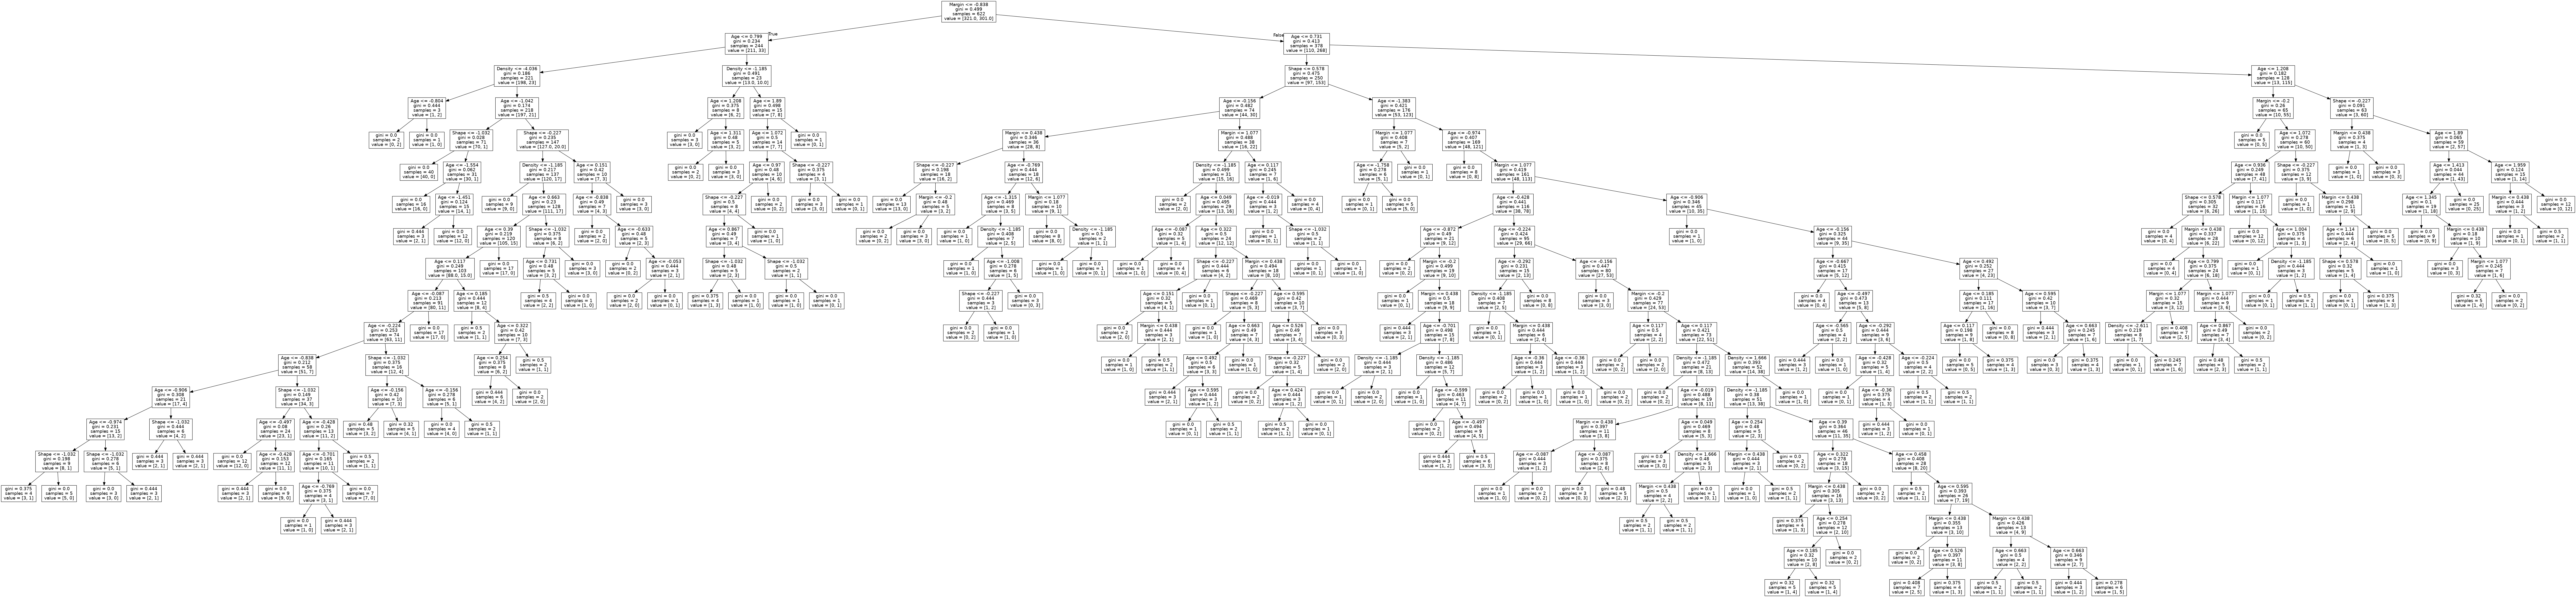

In [82]:
from IPython.display import Image  
from io import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=X.columns)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [83]:
clf.score(X_test,y_test )

0.75

Decision Tree

In [84]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=2)
cv_scores = cross_val_score(clf,X_scaled,y,cv=10)
cv_scores.mean()

0.7397590361445782

Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=17, random_state=2)
cv_scores = cross_val_score(clf,X_scaled,y,cv=10)
cv_scores.mean()

0.7674698795180722

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': np.arange(10,50,1),
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

In [87]:
from sklearn.metrics import accuracy_score
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'n_estimators': 17}
Best Cross-Validation Score: 0.7395870967741935
Test Set Accuracy: 0.7788461538461539


SVM

In [61]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='poly',C=C)

In [97]:
svc_rbf = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc_rbf,X_scaled, y, cv=10)

cv_scores.mean()


0.8012048192771084

In [62]:
cv_scores = cross_val_score(svc,X_scaled, y, cv=10)

cv_scores.mean()

0.7903614457831326

KNN

In [95]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=87)
cv_scores = cross_val_score(clf,X_scaled, y, cv=10)
cv_scores.mean()

0.8096385542168674

In [89]:
for n in range(1, 50):
    clf = KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, X_scaled,y, cv=10)
    print (n, cv_scores.mean())
    

1 0.7216867469879518
2 0.6855421686746987
3 0.7542168674698796
4 0.7313253012048193
5 0.7746987951807229
6 0.7602409638554216
7 0.7867469879518072
8 0.7734939759036145
9 0.7891566265060241
10 0.7855421686746988
11 0.7915662650602411
12 0.7807228915662651
13 0.7879518072289157
14 0.7879518072289158
15 0.7891566265060241
16 0.7843373493975904
17 0.7819277108433734
18 0.7831325301204819
19 0.7819277108433736
20 0.783132530120482
21 0.7819277108433734
22 0.7819277108433735
23 0.7795180722891566
24 0.7771084337349399
25 0.7843373493975904
26 0.7843373493975904
27 0.7855421686746988
28 0.7855421686746988
29 0.7879518072289157
30 0.7879518072289156
31 0.7891566265060241
32 0.789156626506024
33 0.7855421686746987
34 0.7843373493975903
35 0.7867469879518072
36 0.7879518072289156
37 0.7855421686746988
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.7831325301204819
42 0.7831325301204819
43 0.7819277108433734
44 0.7831325301204819
45 0.7831325301204819
46 0.7843373493975904

In [93]:
params = [
    {'n_neighbors': np.arange(45,100,2)},
    {'weights': ['uniform', 'distance']}
]

k_grid_search = GridSearchCV(clf,params,cv=10,scoring="accuracy")
k_grid_search.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=60),
             param_grid=[{'n_neighbors': array([45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77,
       79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
                         {'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [94]:
# Print the best parameters and best score
print("Best Parameters:", k_grid_search.best_params_)
print("Best Cross-Validation Score:", k_grid_search.best_score_)

# Evaluate the best model on the test set
best_model = k_grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'n_neighbors': 87}
Best Cross-Validation Score: 0.8096385542168674
Test Set Accuracy: 0.8413461538461539


Naive Bayes

In [96]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
X_minmax = scaler.fit_transform(X)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, X_minmax, y, cv=10)

cv_scores.mean()


0.7855421686746988

Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, X_scaled, y, cv=10)
cv_scores.mean()

0.8072289156626505

Neural Network

In [141]:
import keras_tuner as kt
import tensorflow as tf

def build_model(hp):
    n_hidden = hp.Int("n_hidden",min_value=0, max_value=8,default=2)
    n_neurons = hp.Int("n_neurons",min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling = "log")
    optimizer = hp.Choice("optimizer",values=["sgd","adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [143]:
random_search_tuner = kt.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=5,
    overwrite=True,
    directory="logs",
    project_name="mammographic_masses",
    seed=42
)
random_search_tuner.search(X_scaled, y, epochs=10)

Trial 5 Complete [00h 00m 02s]
accuracy: 0.7156626582145691

Best accuracy So Far: 0.8192771077156067
Total elapsed time: 00h 00m 14s


In [144]:
top_model = random_search_tuner.get_best_models(num_models=2)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [145]:
best_model = top_model[0]

In [146]:
top_params = random_search_tuner.get_best_hyperparameters()

In [147]:
top_params[0].values

{'n_hidden': 4,
 'n_neurons': 74,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'adam'}

In [148]:
random_search_tuner.oracle.get_best_trials()[0].summary()

Trial 2 summary
Hyperparameters:
n_hidden: 4
n_neurons: 74
learning_rate: 0.00905127409782462
optimizer: adam
Score: 0.8192771077156067


In [118]:
model_nn = tf.keras.Sequential()
model_nn.add(tf.keras.layers.Flatten(input_dim=4))
model_nn.add(tf.keras.layers.Dense(74,activation="relu"))
model_nn.add(tf.keras.layers.Dense(74,activation="relu"))
model_nn.add(tf.keras.layers.Dense(74,activation="relu"))
model_nn.add(tf.keras.layers.Dense(74,activation="relu"))
model_nn.add(tf.keras.layers.Dense(1,activation="sigmoid"))


model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
model_nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 74)             │           370 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 74)             │         5,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 74)             │         5,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 74)             │         5,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            75 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,095 (66.78 KB)

 Trainable params: 17,095 (66.78 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
history = model_nn.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9062 - loss: 0.3221

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8422 - loss: 0.3714 - val_accuracy: 0.8317 - val_loss: 0.4926
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8213 - loss: 0.3906 - val_accuracy: 0.8365 - val_loss: 0.4760
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8345 - loss: 0.3956 - val_accuracy: 0.8413 - val_loss: 0.4769
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.4068 - val_accuracy: 0.8413 - val_loss: 0.4894
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8119 - loss: 0.4158 - val_accuracy: 0.8413 - val_loss: 0.4773
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8288 - loss: 0.3862 - val_accuracy: 0.8365 - val_loss: 0.4849
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8391 - loss: 0.3686 - val_accuracy: 0.8413 - val_loss: 0.4805
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8392 - loss: 0.3672 - val_accuracy: 0.8413 - val_loss: 0.4921
Epo

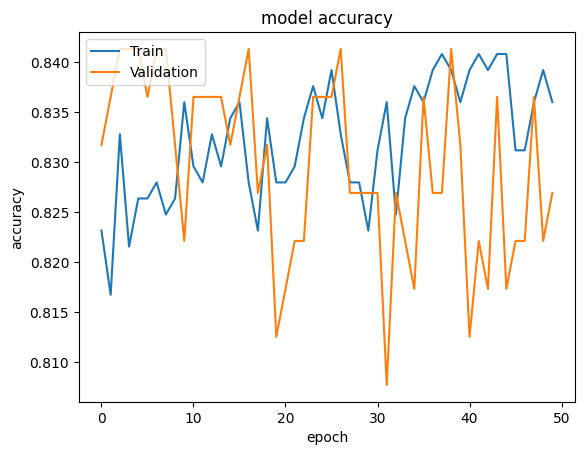

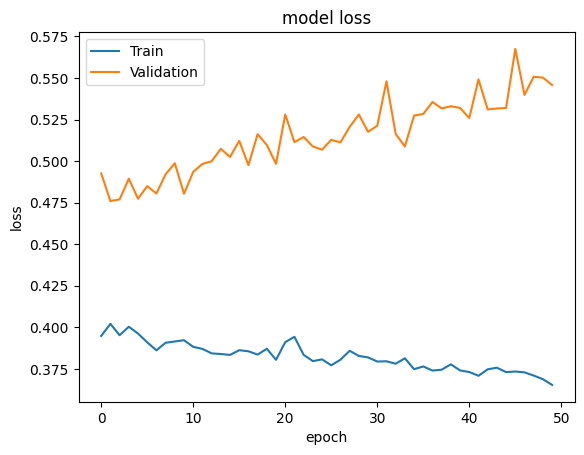

In [135]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [149]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(74, input_dim=4, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    model.add(Dense(74, kernel_initializer='normal', activation='relu'))
    model.add(Dense(74, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

In [150]:
from scikeras.wrappers import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(model=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator,X_scaled,y, cv=10)
cv_scores.mean()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

0.7951807228915663